EDA Siniestros viales

In [54]:
#Importamos las librerias a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Importamos la Dataframe que vamos a trabajar

In [55]:
#importamos las hojas del Dataset que se usaran 
df_hechos = pd.read_csv('../Datasets/homicidios_proc.csv')
df_victimas = pd.read_csv('../Datasets/homicidios_victimas_proc.csv')
df_lesionados = pd.read_csv('../Datasets/lesiones_proc.csv')

Revisamos la consistenvia del df_hechos

In [56]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             695 non-null    object 
 1   N_VICTIMAS     695 non-null    int64  
 2   FECHA          695 non-null    object 
 3   AAAA           695 non-null    int64  
 4   MM             695 non-null    int64  
 5   DD             695 non-null    int64  
 6   HORA           695 non-null    object 
 7   HH             695 non-null    int64  
 8   TIPO_DE_CALLE  695 non-null    object 
 9   COMUNA         695 non-null    int64  
 10  LONGITUD       695 non-null    float64
 11  LATITUD        695 non-null    float64
 12  PARTICIPANTES  695 non-null    object 
 13  VICTIMA        695 non-null    object 
 14  ACUSADO        695 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 81.6+ KB


Algunas columnas no tiene el tipo de dato corespondiente

In [57]:
# Cambiar las variables a tipo category
df_hechos['ID'] = df_hechos['ID'].astype('category')
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])
df_hechos['HORA'] = pd.to_datetime(df_hechos['HORA'], format='%H:%M:%S').dt.time
df_hechos['TIPO_DE_CALLE'] = df_hechos['TIPO_DE_CALLE'].astype('category')
df_hechos['PARTICIPANTES'] = df_hechos['PARTICIPANTES'].astype('category')
df_hechos['VICTIMA'] = df_hechos['VICTIMA'].astype('category')
df_hechos['ACUSADO'] = df_hechos['ACUSADO'].astype('category')

Obtenemos una descripción concisa y resumida del DataFrame. 

In [58]:
df_hechos.head() #Visualizamos el df

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,-58.465039,-34.680930,MOTO-AUTO,MOTO,AUTO
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


Se genera un resumen estadístico para todas las columnas, tanto numéricas como categóricas.

In [59]:
df_hechos.describe(include='all') #Describe el df

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
count,695,695.000000,695,695.000000,695.000000,695.000000,695,695.000000,695,695.000000,695.000000,695.000000,695,695,695
unique,695,NaN,NaN,NaN,NaN,NaN,322,NaN,4,NaN,NaN,NaN,36,9,9
top,2016-0001,NaN,NaN,NaN,NaN,NaN,14:00:00,NaN,AVENIDA,NaN,NaN,NaN,PEATON-PASAJEROS,MOTO,AUTO
freq,1,NaN,NaN,NaN,NaN,NaN,11,NaN,429,NaN,NaN,NaN,109,302,220
mean,NaN,1.030216,2018-09-15 02:49:53.956834560,2018.191367,6.684892,15.920863,NaN,11.677698,NaN,7.437410,-58.441369,-34.619551,NaN,NaN,NaN
min,NaN,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,-58.529942,-34.705250,NaN,NaN,NaN
25%,NaN,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,9.000000,NaN,6.000000,NaN,4.000000,-58.476178,-34.643608,NaN,NaN,NaN
50%,NaN,1.000000,2018-07-14 00:00:00,2018.000000,7.000000,16.000000,NaN,11.000000,NaN,8.000000,-58.444513,-34.622973,NaN,NaN,NaN
75%,NaN,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,23.000000,NaN,17.500000,NaN,11.000000,-58.401412,-34.596003,NaN,NaN,NaN
max,NaN,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,NaN,23.000000,NaN,15.000000,-58.356082,-34.534654,NaN,NaN,NaN


Se evidencia que no hay datos nulos, en el top se puede ver que la mayoria de las victimas son motos y la moyoria de acusados son autos y los participantes mas repetido son peaton-pasajeros

En el ETL se identifico que los valores faltantes estavan como 'SD', verificamos si hay mas valores faltantes

In [60]:
df_hechos.replace('SD', np.nan, inplace=True)

In [61]:
df_hechos.isnull().sum()

ID               0
N_VICTIMAS       0
FECHA            0
AAAA             0
MM               0
DD               0
HORA             0
HH               0
TIPO_DE_CALLE    0
COMUNA           0
LONGITUD         0
LATITUD          0
PARTICIPANTES    0
VICTIMA          0
ACUSADO          0
dtype: int64

Se verifica que los valores faltantes ya fueron tratados

Verificamos outliers 

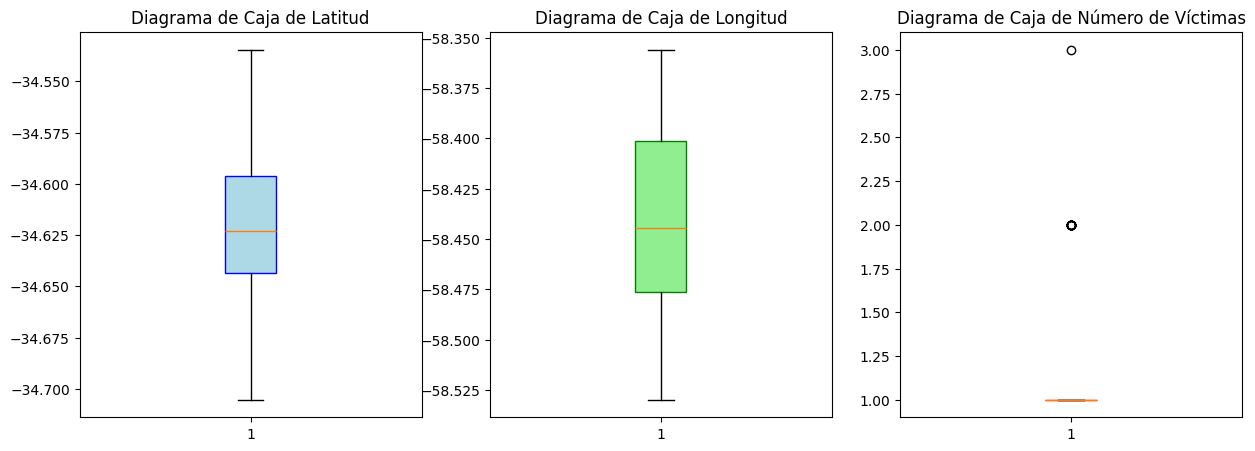

In [62]:
# Graficar boxplots 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Crear una figura con 3 subgráficos en una fila

# Boxplot para la columna de latitud
axs[0].boxplot(df_hechos['LATITUD'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
axs[0].set_title('Diagrama de Caja de Latitud')  # Título del primer subgráfico

# Boxplot para la columna de longitud
axs[1].boxplot(df_hechos['LONGITUD'], patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
axs[1].set_title('Diagrama de Caja de Longitud')  # Título del segundo subgráfico

# Boxplot para la columna de número de víctimas
axs[2].boxplot(df_hechos['N_VICTIMAS'], patch_artist=True, boxprops=dict(facecolor='lightcoral', color='red'))
axs[2].set_title('Diagrama de Caja de Número de Víctimas')  # Título del tercer subgráfico

plt.show()

Al observar los boxplots de las columnas de latitud y longitud, no se identifican valores atípicos (outliers). Esto sugiere que los datos de ubicación (latitud y longitud) no contienen valores inusuales o extremos que podrían indicar ubicaciones erróneas o fuera de la ciudad.

En cuanto a la columna de número de víctimas, se observan algunos valores atípicos, lo cual indica que en algunos casos hay un número inusualmente alto de víctimas en un accidente. Es importante investigar estos casos para comprender las circunstancias que llevaron a un mayor número de víctimas en esos incidentes particulares.

Este análisis nos proporciona una visión inicial de la distribución de los datos y nos ayuda a identificar áreas de interés para un análisis más detallado.

In [63]:
df_hechos[df_hechos['N_VICTIMAS']==3]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
169,2017-0035,3,2017-03-23,2017,3,23,05:00:00,5,AVENIDA,1,-58.358815,-34.611136,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO


Verificamos el outlier de la columna N_VICTIMAS corresponde a un acciden que ocurrio a las 5 am 

Varifiquemos si hay yna correlacion entres el dia de la semana, la hora y el numero de victimas

In [64]:
dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

In [65]:
# Crear una nueva columna con los nombres de los días 
df_hechos['DIA_SEMANA'] = df_hechos['FECHA'].dt.dayofweek.map(dias_semana)

In [66]:
victimas_por_dia = df_hechos.groupby('DIA_SEMANA')['N_VICTIMAS'].mean().reset_index()

In [67]:
# Ordenar los días de la semana en función de su número (0 para lunes, 1 para martes, etc.)
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

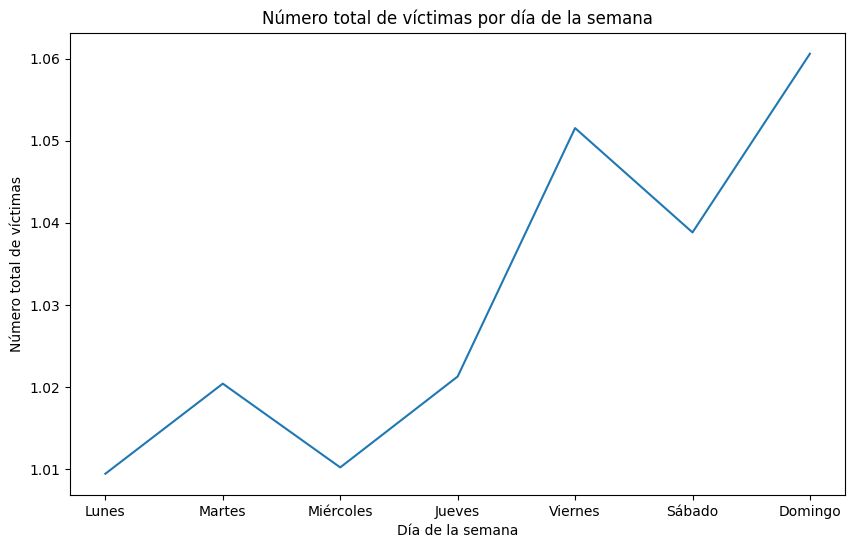

In [68]:
# Crear un gráfico de líneas del número de víctimas por día de la semana
plt.figure(figsize=(10, 6))
sns.lineplot(data=victimas_por_dia.sort_values(by='DIA_SEMANA', key=lambda x: x.map({v: i for i, v in enumerate(orden_dias)})), 
             x='DIA_SEMANA', y='N_VICTIMAS') 
plt.title('Número total de víctimas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número total de víctimas')
plt.xticks(ticks=np.arange(7), labels=orden_dias)  # Establecer las etiquetas de los ejes x como los días de la semana en orden
plt.show()

Este gráfico muestra una leve tendencia creciente hacia el fin de semana, con un ligero aumento en el número de víctimas a medida que nos acercamos al sábado y al domingo. Esto sugiere que los días de fin de semana pueden tener un mayor riesgo de accidentes con víctimas en comparación con los días laborables.

verifiquemos si hay una tendencia con respecto a las horas para los ultimos tres dias de la semana

In [69]:
# Filtrar los datos para los viernes, sábados y domingos
df_weekend = df_hechos[df_hechos['DIA_SEMANA'].isin(['Viernes', 'Sábado', 'Domingo'])]  

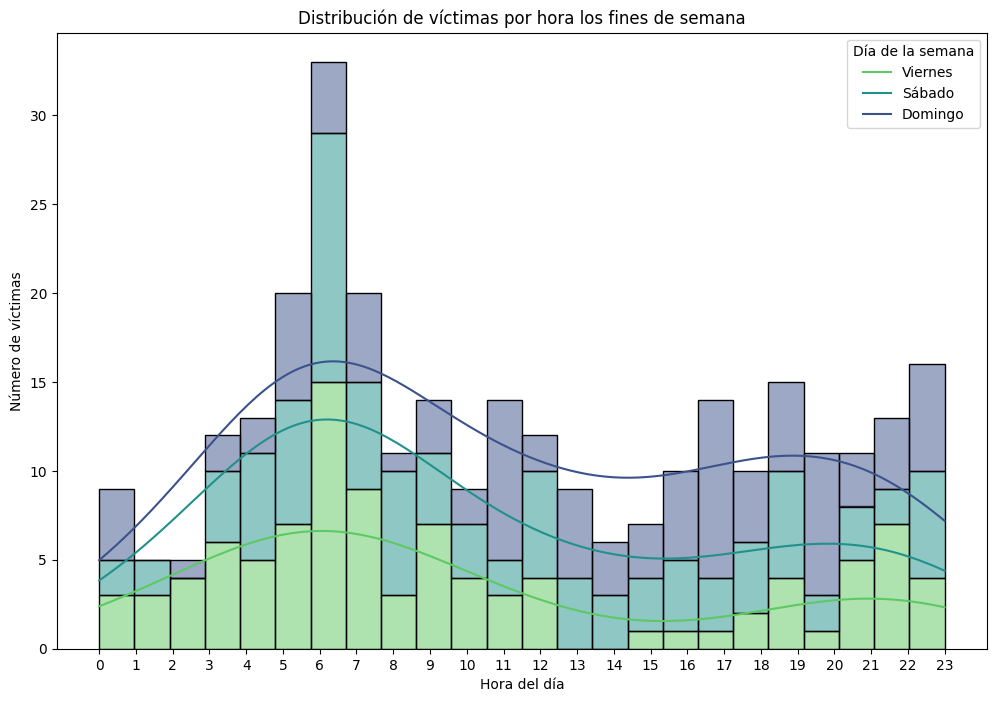

In [70]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.histplot(data=df_weekend, x='HH', bins=24, kde=True, hue='DIA_SEMANA', multiple='stack', palette='viridis')
plt.title('Distribución de víctimas por hora los fines de semana')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.xticks(range(0, 24))  # Mostrar todas las horas en el eje x
plt.legend(title='Día de la semana', labels=['Viernes', 'Sábado', 'Domingo'])
plt.show()

Se evidencia que los sábados y domingos, entre las 5 y las 7 de la mañana, se registra el mayor número de homicidios viales. Esto sugiere que durante esas horas tempranas del fin de semana, puede haber una mayor incidencia de incidentes viales fatales.

Verificamos las victimas en general

C:\Users\Willc\AppData\Local\Temp\ipykernel_16276\356723585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VICTIMA',


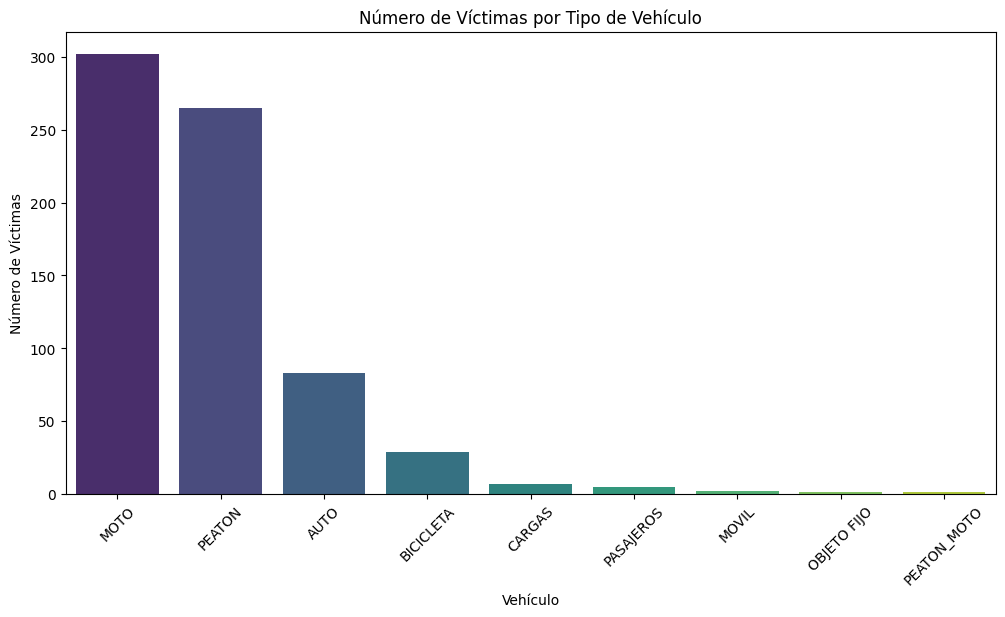

In [71]:
# Crear un gráfico de barras para el número de víctimas por tipo de vehículo
plt.figure(figsize=(12, 6))
sns.countplot(x='VICTIMA', 
              data=df_hechos, 
              order=df_hechos['VICTIMA'].value_counts().index,  # Organizar por el número de víctimas de mayor a menor
              palette='viridis')  # Usar una paleta de colores

plt.title('Número de Víctimas por Tipo de Vehículo')
plt.xlabel('Vehículo')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()

Se evidencia que la mayoria de las victimas son 'MOTO' y 'PEATON'

In [72]:
# Filtrar los datos para los sábados y domingos
df_weekend = df_hechos[(df_hechos['DIA_SEMANA'] == 'Sábado') | (df_hechos['DIA_SEMANA'] == 'Domingo')]

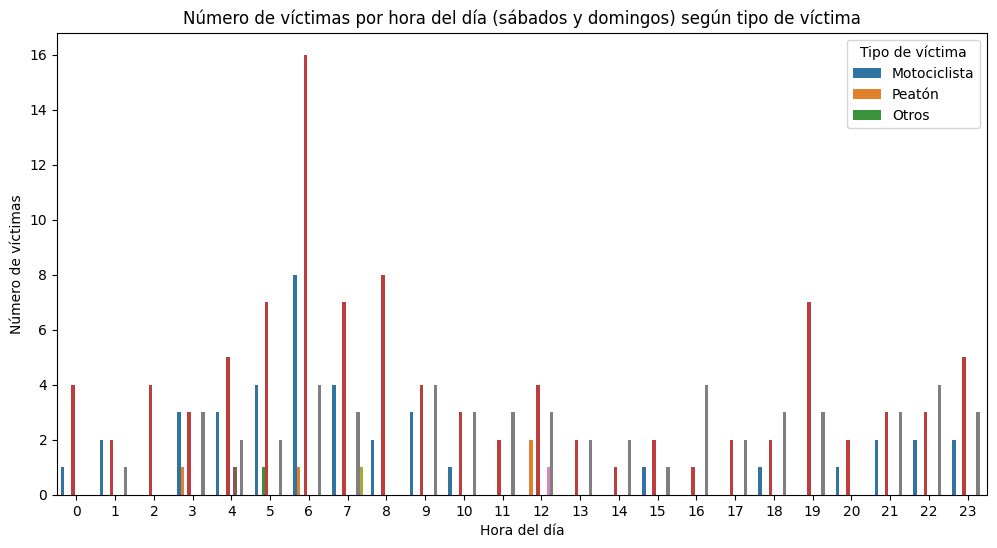

In [73]:
# Crear un gráfico de barras para el número de víctimas por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='HH', data=df_weekend, hue='VICTIMA')
plt.title('Número de víctimas por hora del día (sábados y domingos) según tipo de víctima')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.legend(title='Tipo de víctima', labels=['Motociclista', 'Peatón', 'Otros'])
plt.show()

Aquí se evidencia que la mayoría de las víctimas son motociclistas y peatones, especialmente durante los sábados y domingos, en las horas entre las 5 y 7 de la mañana. Esto sugiere la importancia de tomar medidas específicas para mejorar la seguridad vial para estos grupos durante esos períodos.

Verificamos los acusados en general

C:\Users\Willc\AppData\Local\Temp\ipykernel_16276\1334169571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ACUSADO',


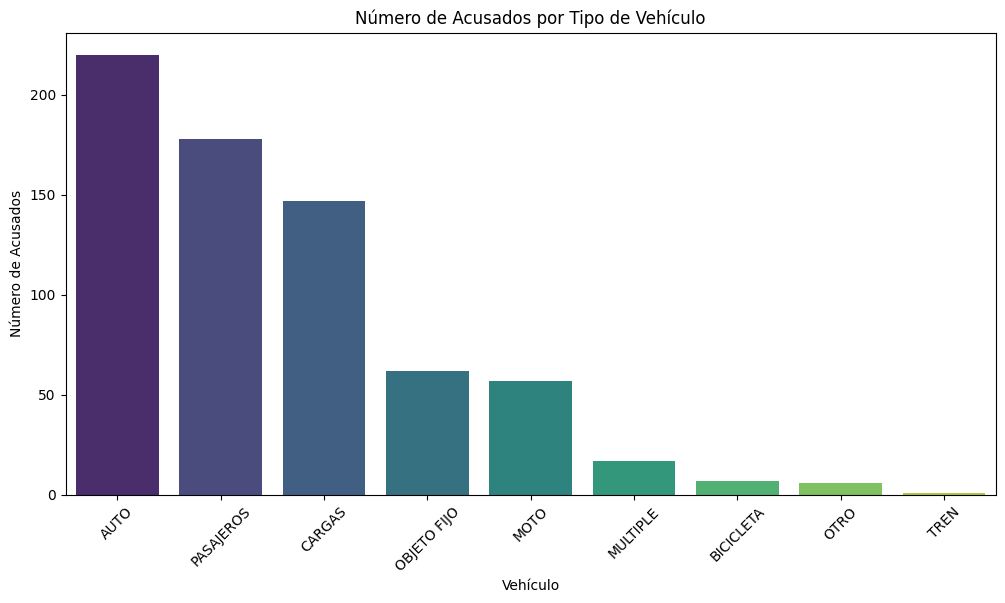

In [74]:
# Crear un gráfico de barras para el número de acusados por tipo de vehículo
plt.figure(figsize=(12, 6))
sns.countplot(x='ACUSADO', 
              data=df_hechos, 
              order=df_hechos['ACUSADO'].value_counts().index,  # Organizar por el número de acusados de mayor a menor
              palette='viridis')  # Usar una paleta de colores

plt.title('Número de Acusados por Tipo de Vehículo')
plt.xlabel('Vehículo')
plt.ylabel('Número de Acusados')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()

Se evidencia que la mayoria de acusados son autos, pasajeros y cargas

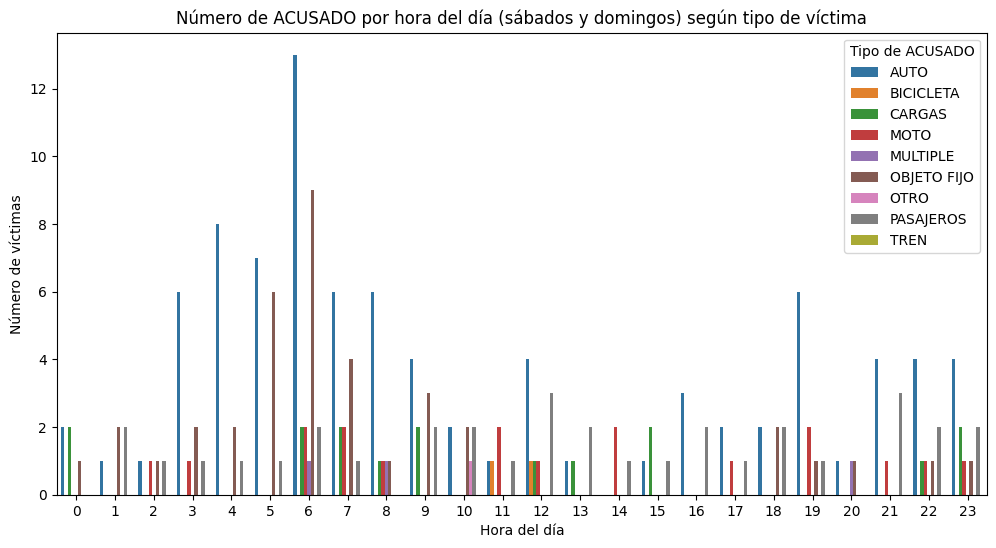

In [75]:
# Crear un gráfico de barras para el número de víctimas por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='HH', data=df_weekend, hue='ACUSADO')
plt.title('Número de ACUSADO por hora del día (sábados y domingos) según tipo de víctima')
plt.xlabel('Hora del día')
plt.ylabel('Número de víctimas')
plt.legend(title='Tipo de ACUSADO') 
plt.show()

Aquí se evidencia que la mayoría de los acusados los días sábados y domingos, entre las 3 y las 9 de la mañana, son autos y objetos fijos.


Considerando que la mayoría de las víctimas son motociclistas y peatones, y que los principales acusados son autos y objetos fijos, se podría recomendar enfocar las campañas de seguridad vial en la protección y concientización de estos grupos vulnerables. Además, se debería prestar especial atención a las horas tempranas de la mañana, especialmente los fines de semana, para implementar medidas preventivas y reducir los accidentes en ese período.

Revisemos el df_lesionados

In [76]:
df_lesionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23785 non-null  object
 1   n_victimas     23785 non-null  int64 
 2   aaaa           23785 non-null  int64 
 3   mm             23785 non-null  int64 
 4   dd             23785 non-null  int64 
 5   fecha          23785 non-null  object
 6   participantes  23785 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.3+ MB


Cambiemos el nombre a las columnas para que coincidan con el otro de df

In [83]:
df_lesionados = df_lesionados.rename(columns={'id':'ID', 'n_victimas' : 'N_VICTIMAS', 'aaaa': 'AAAA', 'mm':'MM', 'dd':'DD', 'fecha':'FECHA', 'participantes': 'PARTICIPANTES'})

Cambiamos la columna ID a categorica

In [84]:
# Cambiar las variables a tipo category
df_lesionados['ID'] = df_lesionados['ID'].astype('category')


Obtenemos una descripción concisa y resumida del DataFrame.

In [85]:
df_lesionados.describe(include='all') #Describe el df

,ID,N_VICTIMAS,AAAA,MM,DD,FECHA,PARTICIPANTES
count,23785,23785.000000,23785.000000,23785.000000,23785.000000,23785,23785
unique,23785,NaN,NaN,NaN,NaN,1096,128
top,HC-2020-0129167,NaN,NaN,NaN,NaN,2021-12-17,SD-SD
freq,1,NaN,NaN,NaN,NaN,55,10535
mean,NaN,1.160563,2019.901324,6.597561,15.616355,NaN,NaN
std,NaN,0.551571,0.859432,3.476955,8.700047,NaN,NaN
min,NaN,0.000000,2019.000000,1.000000,1.000000,NaN,NaN
25%,NaN,1.000000,2019.000000,3.000000,8.000000,NaN,NaN
50%,NaN,1.000000,2020.000000,7.000000,16.000000,NaN,NaN
75%,NaN,1.000000,2021.000000,10.000000,23.000000,NaN,NaN


Buscamos outliers

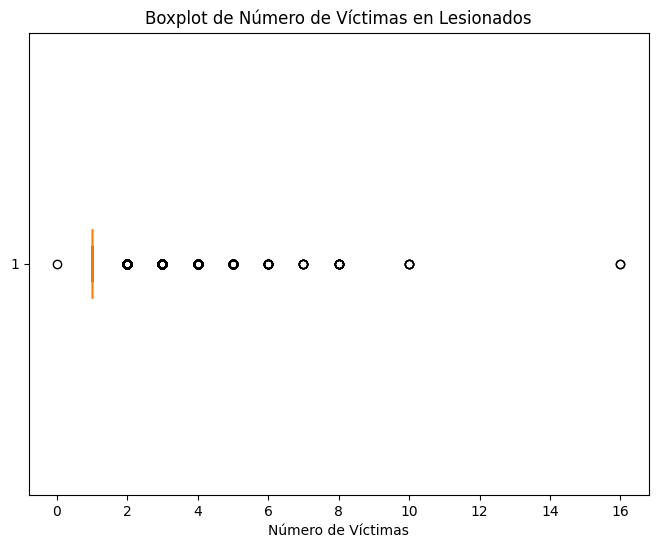

In [86]:
# Crear un gráfico de boxplot para la columna N_VICTIMAS en df_lesionados
plt.figure(figsize=(8, 6))
plt.boxplot(df_lesionados['N_VICTIMAS'], vert=False, patch_artist=True)

# Añadir título y etiquetas
plt.title('Boxplot de Número de Víctimas en Lesionados')
plt.xlabel('Número de Víctimas')

# Mostrar el gráfico
plt.show()

revisamos los datos outliers

In [87]:
df_lesionados[df_lesionados['N_VICTIMAS']>6]

,ID,N_VICTIMAS,AAAA,MM,DD,FECHA,PARTICIPANTES
524,LC-2019-0049800,10,2019,1,23,2019-01-23,OTRO-SD
2303,LC-2019-0188476,16,2019,3,26,2019-03-26,SD-SD
3151,LC-2019-0247906,8,2019,4,21,2019-04-21,SD-SD
3766,LC-2019-0291069,16,2019,5,10,2019-05-10,SD-SD
4138,LC-2019-0315787,8,2019,5,20,2019-05-20,TRANSPORTE PUBLICO-SD
4589,LC-2019-0348447,8,2019,6,4,2019-06-04,AUTO-SD
5735,LC-2019-0428120,10,2019,7,11,2019-07-11,SD-SD
6164,LC-2019-0459476,8,2019,7,25,2019-07-25,TRANSPORTE PUBLICO-SD
8641,LC-2019-0655333,10,2019,10,19,2019-10-19,SD-SD
11634,LC-2020-0087811,7,2020,2,10,2020-02-10,TRANSPORTE PUBLICO-TRANSPORTE PUBLICO


Entendido, parece que los datos corresponden a accidentes en los que estuvieron involucrados buses. En este contexto, un valor atípico en el número de víctimas podría no ser necesariamente un error, ya que los accidentes que involucran buses pueden tener un mayor número de víctimas en comparación con otros tipos de accidentes. Es importante tener en cuenta el contexto específico al analizar valores atípicos en los datos.

Hallemos las probabilidades de sufrir un accidente, que este sea una lesion o un siniestro por dia

In [124]:
# Filtrar los datos para el período de interés (2019-2021)
df_hechos_periodo = df_hechos[df_hechos['FECHA'].dt.year.between(2019, 2021)]
df_lesionados_periodo = df_lesionados[df_lesionados['FECHA'].dt.year.between(2019, 2021)]

# Agrupar por día de la semana y sumar el número de víctimas
accidentes_por_dia_hechos = df_hechos.groupby([df_hechos['FECHA'].dt.dayofweek, df_hechos['FECHA'].dt.hour])['N_VICTIMAS'].count()
accidentes_por_dia_lesionados = df_lesionados.groupby([df_lesionados['FECHA'].dt.dayofweek, df_lesionados['FECHA'].dt.hour])['N_VICTIMAS'].count()

# Calcular el total de accidentes para normalizar las probabilidades
total_accidentes_hechos = accidentes_por_dia_hechos.sum()
total_accidentes_lesionados = accidentes_por_dia_lesionados.sum()

# Calcular las probabilidades
probabilidad_por_dia_siniestro = accidentes_por_dia_hechos / total_accidentes_hechos
probabilidad_por_dia_lesionados = accidentes_por_dia_lesionados / total_accidentes_lesionados

Probabilidad general

In [113]:
# Filtrar los datos para el período de interés (2019-2021)
df_hechos_periodo = df_hechos[df_hechos['FECHA'].dt.year.between(2019, 2021)]

# Concatenar los DataFrames df_hechos y df_lesionados
df_total = pd.concat([df_hechos_periodo, df_lesionados])

# Convertir la columna 'FECHA' a tipo datetime si no lo está ya
df_total['FECHA'] = pd.to_datetime(df_total['FECHA'])

# Agrupar por día de la semana y contar el número de accidentes que resultaron en lesiones o siniestros
accidentes_por_dia = df_total.groupby(df_total['FECHA'].dt.dayofweek)['N_VICTIMAS'].count()

# Calcular el total de accidentes para normalizar las probabilidades
total_dias = accidentes_por_dia.sum()

# Calcular la probabilidad de que ocurra un accidente que resulte en una lesión o un siniestro por día de la semana
probabilidad_por_dia = accidentes_por_dia / total_dias


In [114]:
# Crear un diccionario con los nombres de los días de la semana y las probabilidades
dias_semana = {
    0.0: 'Lunes',
    1.0: 'Martes',
    2.0: 'Miércoles',
    3.0: 'Jueves',
    4.0: 'Viernes',
    5.0: 'Sábado',
    6.0: 'Domingo'
}

In [111]:
# Crear un DataFrame con los nombres de los días de la semana y las probabilidades
df_probabilidad = pd.DataFrame({
    'Día de la semana': [dias_semana[dia] for dia in probabilidad_por_dia.index],
    'Probabilidad_de_Accidente': probabilidad_por_dia.values,
    'Probabilidad_Siniestro': probabilidad_por_dia_siniestro,
    'Probabilidad_Lesion': probabilidad_por_dia_lesionados
})

In [125]:
df_probabilidad

,,Día de la semana,Probabilidad_de_Accidente,Probabilidad_Siniestro,Probabilidad_Lesion
FECHA,FECHA,,,,
0,0,Lunes,0.145742,0.152518,0.146016
1,0,Martes,0.155716,0.141007,0.155518
2,0,Miércoles,0.161202,0.141007,0.161572
3,0,Jueves,0.162698,0.135252,0.162539
4,0,Viernes,0.171965,0.139568,0.172630
5,0,Sábado,0.113785,0.148201,0.113181
6,0,Domingo,0.088892,0.142446,0.088543


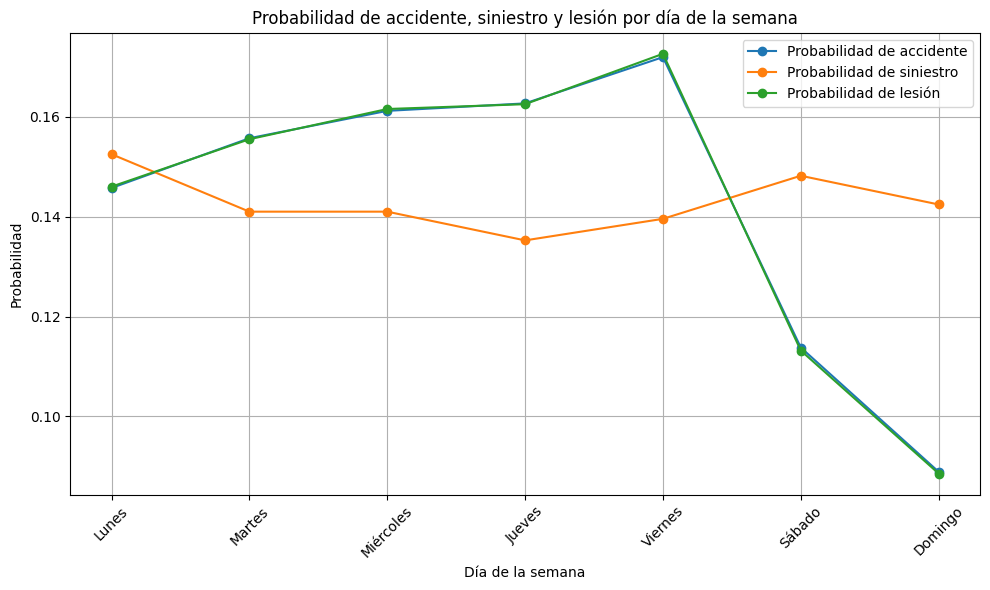

In [112]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Agregar las líneas para cada serie de datos
plt.plot(df_probabilidad['Día de la semana'], df_probabilidad['Probabilidad_de_Accidente'], marker='o', label='Probabilidad de accidente')
plt.plot(df_probabilidad['Día de la semana'], df_probabilidad['Probabilidad_Siniestro'], marker='o', label='Probabilidad de siniestro')
plt.plot(df_probabilidad['Día de la semana'], df_probabilidad['Probabilidad_Lesion'], marker='o', label='Probabilidad de lesión')

# Agregar etiquetas y título
plt.xlabel('Día de la semana')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de accidente, siniestro y lesión por día de la semana')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Mostrar cuadrícula en el gráfico
plt.tight_layout()  # Ajustar diseño
plt.show()

Algunas conclusiones que se pueden obtener de estos datos son:

Distribución de accidentes por día de la semana: Los días jueves tienen la mayor probabilidad de accidentes, seguidos por los sábados y martes. Los domingos tienen la menor probabilidad. Esta distribución puede estar relacionada con patrones de actividad y tráfico durante la semana.

Probabilidad de siniestros: Aunque los jueves tienen la mayor probabilidad de accidentes, la probabilidad de que un accidente resulte en un siniestro es más baja en comparación con otros días de la semana. Sin embargo, si consideramos que los siniestros los días sábado, domingo y lunes ocurren mayormente entre horas de la madrugada y las 8 de la mañana, esto podría indicar que los siniestros en esos días y horas podrían ser más graves debido a la menor presencia de tráfico y mayor velocidad promedio.

Probabilidad de lesiones: Los viernes tienen la mayor probabilidad de resultar en lesiones en caso de accidentes, seguidos por los jueves y miércoles. Los domingos tienen la menor probabilidad de resultar en lesiones. Esta distribución puede estar relacionada con factores como la densidad de tráfico y la exposición a situaciones de riesgo.

Comparación con días laborables y fines de semana: Los días laborables (lunes a viernes) tienden a tener una mayor probabilidad de accidentes en general, mientras que los fines de semana (sábado y domingo) muestran una mayor variabilidad en la probabilidad de accidentes y sus consecuencias. Sin embargo, si consideramos que los siniestros en esos días y horas ocurren mayormente entre horas de la madrugada y las 8 de la mañana, esto podría indicar que los siniestros en esos días y horas podrían ser más graves debido a la menor presencia de tráfico y mayor velocidad promedio.

En resumen, el análisis de las horas de los siniestros en los días sábado, domingo y lunes agrega un aspecto importante al entendimiento de la probabilidad de accidentes y sus consecuencias, sugiriendo que estos siniestros podrían ser más graves debido a las condiciones de tráfico y velocidad durante esas horas

Revisamos el df_victimas

In [126]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             716 non-null    object
 1   FECHA                716 non-null    object
 2   AAAA                 716 non-null    int64 
 3   MM                   716 non-null    int64 
 4   DD                   716 non-null    int64 
 5   ROL                  716 non-null    object
 6   VICTIMA              716 non-null    object
 7   SEXO                 716 non-null    object
 8   EDAD                 716 non-null    int64 
 9   FECHA_FALLECIMIENTO  716 non-null    object
dtypes: int64(4), object(6)
memory usage: 56.1+ KB


Vamos a corregir el tipo de dato (Dtype).

In [129]:
# Cambiar las variables a tipo category
df_victimas['ID_hecho'] = df_victimas['ID_hecho'].astype('category')
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])
df_victimas['ROL'] = df_victimas['ROL'].astype('category')
df_victimas['SEXO'] = df_victimas['SEXO'].astype('category')
df_victimas['VICTIMA'] = df_victimas['VICTIMA'].astype('category')
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'])

Visualizamos el encabezado

In [130]:
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,2016-01-10
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01


Obtenemos una descripción concisa y resumida del DataFrame.

In [132]:
df_victimas.describe(include='all') #Describe el df

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
count,716,716,716.000000,716.000000,716.000000,716,716,716,716.000000,716
unique,695,NaN,NaN,NaN,NaN,4,7,2,NaN,NaN
top,2017-0035,NaN,NaN,NaN,NaN,CONDUCTOR,MOTO,MASCULINO,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,339,310,550,NaN,NaN
mean,NaN,2018-09-09 22:25:28.491620096,2018.177374,6.681564,15.945531,NaN,NaN,NaN,42.220670,2018-09-11 02:06:42.234636800
min,NaN,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,2016-01-01 00:00:00
25%,NaN,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,NaN,NaN,NaN,28.000000,2017-04-02 12:00:00
50%,NaN,2018-07-08 12:00:00,2018.000000,7.000000,16.000000,NaN,NaN,NaN,37.000000,2018-07-08 12:00:00
75%,NaN,2019-12-18 18:00:00,2019.000000,10.000000,23.000000,NaN,NaN,NaN,55.000000,2019-12-19 00:00:00
max,NaN,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,NaN,NaN,NaN,95.000000,2022-01-03 00:00:00


Se evidencia que las victimas en su mayoria son motos y el rol masculino

verificamos los nulos

In [133]:
df_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

Graficamos el genero

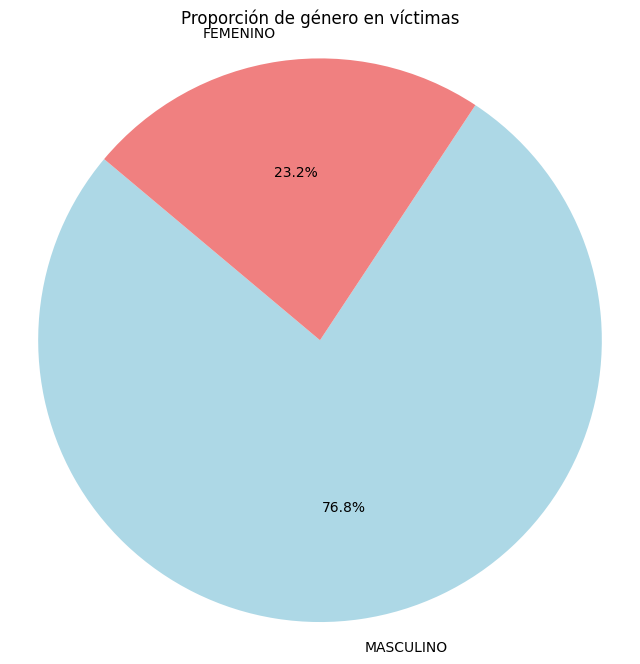

In [140]:
# Obtener la cuenta de valores únicos en la columna 'sexo'
conteo_sexos = df_victimas['SEXO'].value_counts()

# Crear una lista de colores para los segmentos del gráfico
colores = ['lightblue', 'lightcoral']

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(conteo_sexos, labels=conteo_sexos.index, autopct='%1.1f%%', colors=colores, startangle=140)
plt.title('Proporción de género en víctimas')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.show()

La diferencia proporsional es muy grande, mas de 2/3 son masculinos

Graficamos el rol de las victiimas

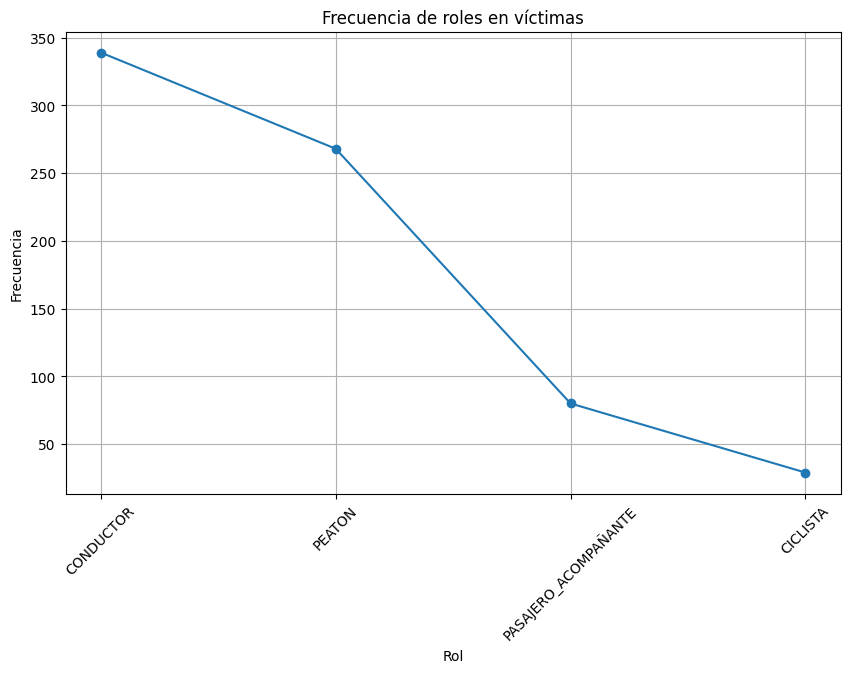

In [145]:
# Obtener las categorías únicas en la columna 'rol' y contar su frecuencia
conteo_rol = df_victimas['ROL'].value_counts()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(conteo_rol.index, conteo_rol.values, marker='o', linestyle='-')
plt.title('Frecuencia de roles en víctimas')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar los nombres de los roles para mejor visualización
plt.grid(True)  # Mostrar cuadrícula en el gráfico
plt.show()

Se evidencia que en la mayoria de los caso las victimas conducian sus vehiculos seguido de peatones

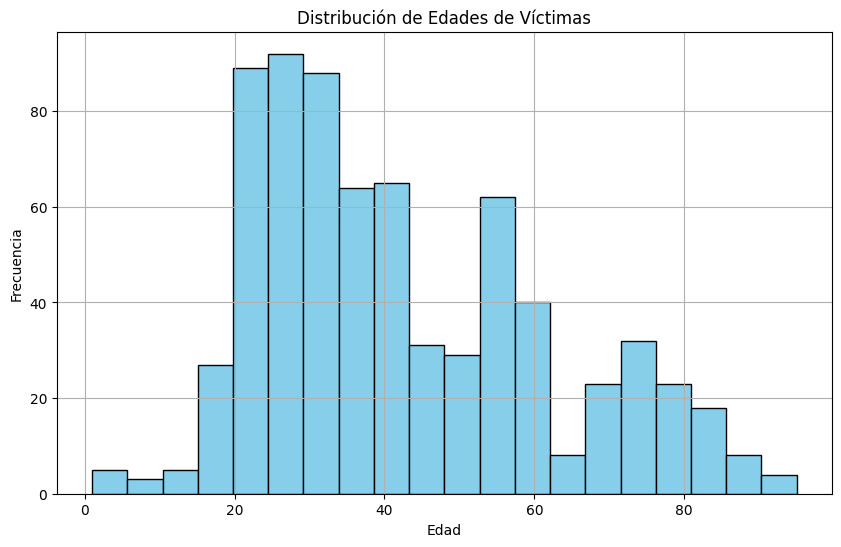

In [147]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_victimas['EDAD'], bins=20, color='skyblue', edgecolor='black')  # 20 bins para dividir el rango de edades
plt.title('Distribución de Edades de Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)  # Mostrar cuadrícula en el gráfico
plt.show()

Si revisamos la distribucion por edad vemos que la maoria de las victimas estaba entre 20 y 55 años

Basado en los gráficos obtenidos, podemos observar que más del 70% de las víctimas son de sexo masculino, lo que indica una disparidad significativa de género en los accidentes. Además, el rol mayoritario de las víctimas es el de conductor, seguido por el de peatón, lo que sugiere que los conductores están en mayor riesgo de sufrir accidentes. En cuanto a la edad, la mayoría de las víctimas se encuentran en el rango de 20 a 57 años, lo que indica que las personas en edad laboral están particularmente expuestas a los accidentes viales. Estos hallazgos resaltan la importancia de implementar medidas de seguridad vial dirigidas especialmente a los conductores masculinos en este rango de edad para reducir la incidencia de accidentes.